# **Excercise Sheet 1:** Dimensionality Reduction

# Part A: Foundations & Concepts

Before getting into coding and applying the dimensionalty reduction techniques, we want to make sure why are we using these techniques and refreshing our understanding of the concepts behind them. 

Therefore please think yourself before asking ChatGPT 😉 You are also welcome to discuss the questions with your peers.

## 1. Dimensionality Reduction

### a) Why do we use dimensionality reduction techniques such as PCA, MDS, t-SNE and UMAP to visualize data?

#### Your Answer:

#### Solution:
1. **Humans can only visualize data in 2D or 3D:** It is impossible to directly vsiualize data with more than three dimensions. Dimensionality reudction projects high-dimensional data into 2D or 3D, making it possible to plot and visually inspect the data.
2. **Capturing data structure:** These techniques aim to preserve important aspects of the data's structure (such as distances, clusters or patterns) in the reduced space, so that clusters or interesting patterns become visible and can be detected.

### b) How does PCA work? Describe the concept briefly in your own words

#### Your Answer:

#### Solution:
PCA transforms the data into a new coordinate system where the new axes (principal components) are aligned with the directions of greatest variance in the data, and each axis is uncorrelated (independent) from the others. This allows us to represent the data in fewer dimensions while retaining as much of the original information as possible. 

### c) What are the advantages of t-SNE and UMAP compared to PCA and MDS?

#### Your Answer:

#### Solution:
PCA and MDS assume that the data can be well-represented by a linear subspace, while t-SNE and UMAP are non-linear techniques that can capture more complex relationships in the data.
t-SNE and UMAP are therefore particularly effective for visualizing high-dimensional data with complex, nonlinear neighborhood structures.

## 2. Similarity Measures

### a) What do similarity measures capture in general?

#### Your Answer:

#### Solution:
Similarity measures quantify how alike two observations are based on their features. For example we can compare two individuals based on clinical markers, such as BMI.

### b) Make an example with having two patients and one healthy participant
Each one having taken 10 different clinical measurements specific to their disease (features). What value do you expect the similarity measure to be between the participants?

#### Your Answer:

#### Solution:
Considering two patients and one healthy participant, each with 10 clinical measurements related to a disease, we can compute the distance (=dissimilarity) between them: 
- The distance between the two patients is expected to be small, reflecting similar disease-specific measurements. 
- The distance between each patient and the healthy participant should be larger, since the healthy participant’s measurements differ from those typical of the disease. 
- Thus, smaller distance means higher similarity, and patients with the same condition tend to be more similar to each other than to healthy individuals. 

### c) What does Euclidean Distance measure?

#### Your Answer:

#### Solution:
Euclidean distance measures the straight-line distance between two datapoints over all dimensions. It quantifies how similar or different observations are by calculating the square root of the sum of squared differences across all features.

### d) What does a similarity matrix represent?

#### Your Answer:

#### Solution:
A similarity matrix represents the pairwise similarity (=distance) between all observations in a dataset. Each observation appears on both the x- and y-axes, and each cell shows the similarity score (e.g., Euclidean distance) between two. The matrix is symmetric—the similarity between observation A and observation B is the same as the other way round. The diagonal contains perfect similarity scores (usually 1), as each observation is identical to itself. This matrix can be visualized to spot patterns or used for downstream analyses like clustering. 

<br><br>
# Part B: Coding & Visualization

Now let's apply our knowledge of dimensionality reduction techniques and similarity measures! We start with some imports needed.

*Hint:* The functions imported from the Helper file, may help you in certain tasks, but you are not required to use them. You can also write your own code to achieve the same results. 

## Notes:
- Do we want to scale for one hot encoding? else one hot encoding has no impact. Also this would be a better example for scaling vs no-scaling imo
- maybe make dataset for umap/tsne more noisy, results look too goods
- I would add a little text (1-2 sentences) for each dataset, just that they know the basic idea of the dataset
- Maybe give the student multiple code cells with comments such that they have some guidances
- Similarity measures, me noise + no manhatten, evtl die beide regions nebenang due

In [2]:
# imports
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from helper import plot_projection

from helper import plot_similarity_matrices
from sklearn.metrics import pairwise_distances

from helper import plot_projection_grid

import gower
import umap
from helper import plot_projection_grid

import warnings
warnings.filterwarnings("ignore")

## 3. PCA for visualization

### **Task: Data exploration**
- Load and inspect the dataset `clinical_data.csv`
- What types of features ("predictors") and outcomes are present in the dataset?
- Do you have categorical features? If so, are they encoded as numbers or strings?

#### Your Answer:

#### Solution:

In [3]:
# Load Data
df = pd.read_csv("clinical_data.csv")

In [4]:
# Inspect data
print(df.shape)
df.head()

(300, 12)


,patient_id,age,gender,bmi,bp_systolic,cholesterol,glucose,heart_rate,smoking_status,education,medication,status
0,P001,45.5,Female,23.7,105,228,107,70,Never,Bachelor,No,Healthy
1,P002,52.2,Female,22.2,133,244,118,76,Former,PhD,Yes,Patient
2,P003,85.0,Female,24.4,144,223,127,90,Current,PhD,No,Patient
3,P004,67.6,Female,27.2,149,259,136,61,Former,Bachelor,No,Patient
4,P005,20.7,Male,20.6,143,216,85,57,Never,Bachelor,No,Healthy


In [5]:
# Check the features and outcomes
print("Features:")
print(df.columns.tolist())
print("\nOutcome (status):")
print(df['status'].value_counts())

Features:
['patient_id', 'age', 'gender', 'bmi', 'bp_systolic', 'cholesterol', 'glucose', 'heart_rate', 'smoking_status', 'education', 'medication', 'status']

Outcome (status):
status
Patient    171
Healthy    129
Name: count, dtype: int64


In [6]:
# Check for categorical features and their values
print("Data types:")
print(df.dtypes)

Data types:
patient_id         object
age               float64
gender             object
bmi               float64
bp_systolic         int64
cholesterol         int64
glucose             int64
heart_rate          int64
smoking_status     object
education          object
medication         object
status             object
dtype: object


In [7]:
# Prepare dataset for later analysis
X = df.drop(columns=['status', 'patient_id'])
y = df['status']

In [8]:
# Identify feature types
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric features ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")
print()

Numeric features (6): ['age', 'bmi', 'bp_systolic', 'cholesterol', 'glucose', 'heart_rate']
Categorical features (4): ['gender', 'smoking_status', 'education', 'medication']



### a) Apply PCA
- Perform PCA on the dataset. 
- Do you encounter an error? If so, what could be the issue?

In [9]:
# Student Code

In [10]:
# Apply PCA
try:
    pca = PCA()
    X_pca = pca.fit_transform(X[numeric_cols])
except ValueError as e:
    print(f"Error applying PCA: {e}")
    print("PCA requires numerical data. Ensure that all features are numeric or encoded properly.")

### b) What is the issue? How can you solve it?

*Hint:* Exclude variables that caused features.

In [11]:
# Student Code

#### Solution:
The problem lies in the fact that PCA cannot handle categorical features. Therefore, we need to remove or encode the categorical features from the dataset before applying PCA. We will continue by removing the categorical features.

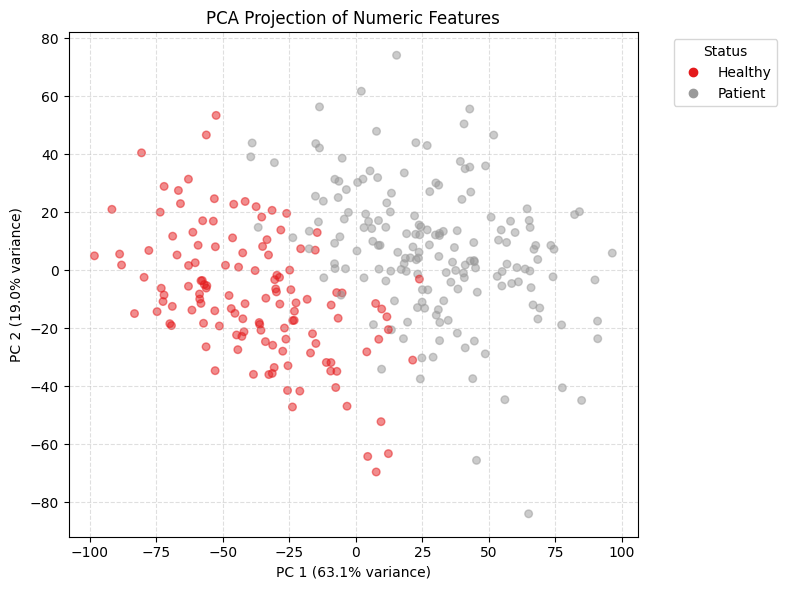

In [13]:
# Solution Code

# Remove categorical features
X_numeric = X[numeric_cols]
X_pca_numeric = pca.fit_transform(X_numeric)

plot_projection(X_pca_numeric, y, title="PCA Projection of Numeric Features",
                xlabel=f"PC 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)",
                ylabel=f"PC 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)",
                legend_title="Status")

### c) Does it make sense to scale the data before applying PCA?
- Why or why not?

*Hint:* Do you have variables with different scales/units?

In [14]:
# Student Code

#### Solution:
Scaling is very important for PCA, as it is sensitive to the scale of the features. If features are on different scales, PCA may be biased towards features with larger scales. Therefore, it is recommended to standardize the data (mean=0, variance=1) before applying PCA. 


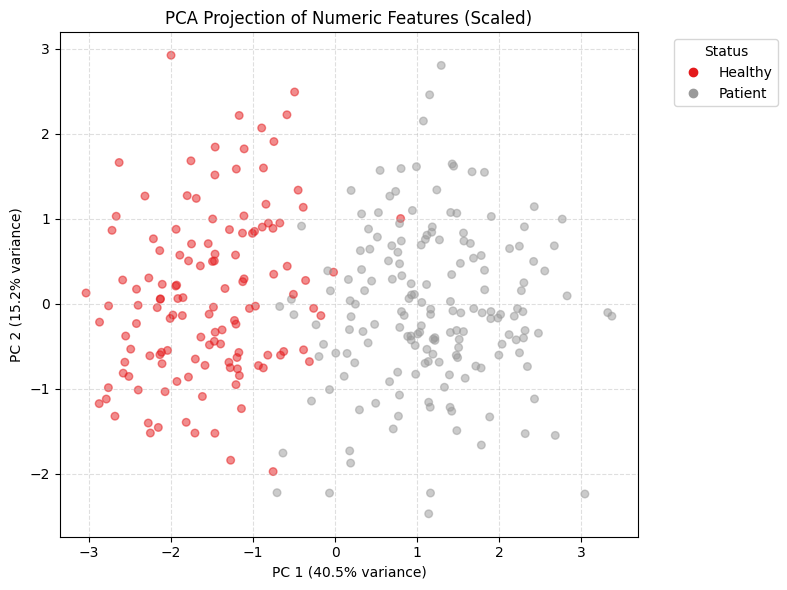

In [15]:
# Scaling
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)

X_pca_scaled = pca.fit_transform(X_numeric_scaled)

plot_projection(X_pca_scaled, y, title="PCA Projection of Numeric Features (Scaled)",
                xlabel=f"PC 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)",
                ylabel=f"PC 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)",
                legend_title="Status")

### d) Compute Gower Similarity on whole dataset.
- Perform MDS on the resulting similarity matrix and visualize using the first two components
- What pattern do you observe? Are ther clusters of patients and healthy visible?

In [16]:
# Student Code

In [190]:
# Solution Code

# Compute Gower
gower_dist = gower.gower_matrix(X)

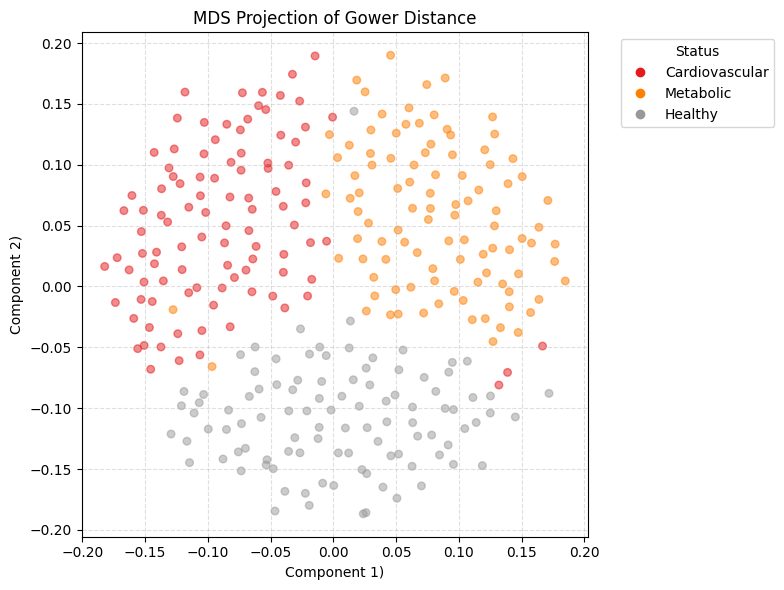

In [191]:
# Apply PCA
from sklearn.manifold import MDS

mds_gower = MDS(n_components=2, random_state=42, dissimilarity='precomputed')
X_pca_gower = mds_gower.fit_transform(gower_dist)

plot_projection(X_pca_gower, y, title="MDS Projection of Gower Distance",
                xlabel=f"Component 1)",
                ylabel=f"Component 2)",
                legend_title="Status")

#### Solution:
The plot reveals distinct clustering between healthy individuals (red) and patients (gray), showing that MDS on Gower distances successfully preserved the clinical patterns that distinguish these two groups in the lower-dimensional visualization. However theres also more other clusterings visible, which might be due to other features.

## 4. t-SNE and UMAP for visualization

### a) Load and inspect the dataset `clinical_data.csv`. 
- The outcome column is `diagnosis`.
- What types of features ("predictors") and outcomes are present in the dataset?

TODO: Add more information about the dataset

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import umap
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

def create_high_dimensional_clinical_dataset():
    """
    Create a high-dimensional clinical dataset with 3 distinct patient groups
    """
    n_samples_per_group = 100
    n_features = 50  # High dimensional
    
    # Group 1: Cardiovascular patients
    cardio_mean = np.random.normal(0, 0.5, n_features)
    cardio_mean[0:10] = [2.5, 3.0, 2.8, 3.2, 2.9, 3.1, 2.7, 3.3, 2.6, 3.4]  # Heart-related features
    cardio_data = np.random.multivariate_normal(
        cardio_mean, 
        np.eye(n_features) * 0.3, 
        n_samples_per_group
    )
    
    # Group 2: Metabolic patients  
    metabolic_mean = np.random.normal(0, 0.5, n_features)
    metabolic_mean[10:20] = [3.5, 4.0, 3.8, 4.2, 3.9, 4.1, 3.7, 4.3, 3.6, 4.4]  # Metabolism-related features
    metabolic_data = np.random.multivariate_normal(
        metabolic_mean, 
        np.eye(n_features) * 0.3, 
        n_samples_per_group
    )
    
    # Group 3: Healthy controls
    healthy_mean = np.random.normal(0, 0.5, n_features)
    healthy_mean[20:30] = [-1.5, -1.0, -1.8, -1.2, -1.9, -1.1, -1.7, -1.3, -1.6, -1.4]  # Normal ranges
    healthy_data = np.random.multivariate_normal(
        healthy_mean, 
        np.eye(n_features) * 0.3, 
        n_samples_per_group
    )
    
    # Combine all data
    all_data = np.vstack([cardio_data, metabolic_data, healthy_data])
    labels = np.array(['Cardiovascular'] * n_samples_per_group + 
                     ['Metabolic'] * n_samples_per_group + 
                     ['Healthy'] * n_samples_per_group)
    
    # Create feature names
    feature_names = []
    feature_names.extend([f'Heart_biomarker_{i+1}' for i in range(10)])
    feature_names.extend([f'Metabolic_biomarker_{i+1}' for i in range(10)])
    feature_names.extend([f'Immune_marker_{i+1}' for i in range(10)])
    feature_names.extend([f'Protein_level_{i+1}' for i in range(10)])
    feature_names.extend([f'Gene_expression_{i+1}' for i in range(10)])
    
    # Create DataFrame
    df = pd.DataFrame(all_data, columns=feature_names)
    df['diagnosis'] = labels
    
    return df

# Create the dataset
df = create_high_dimensional_clinical_dataset()


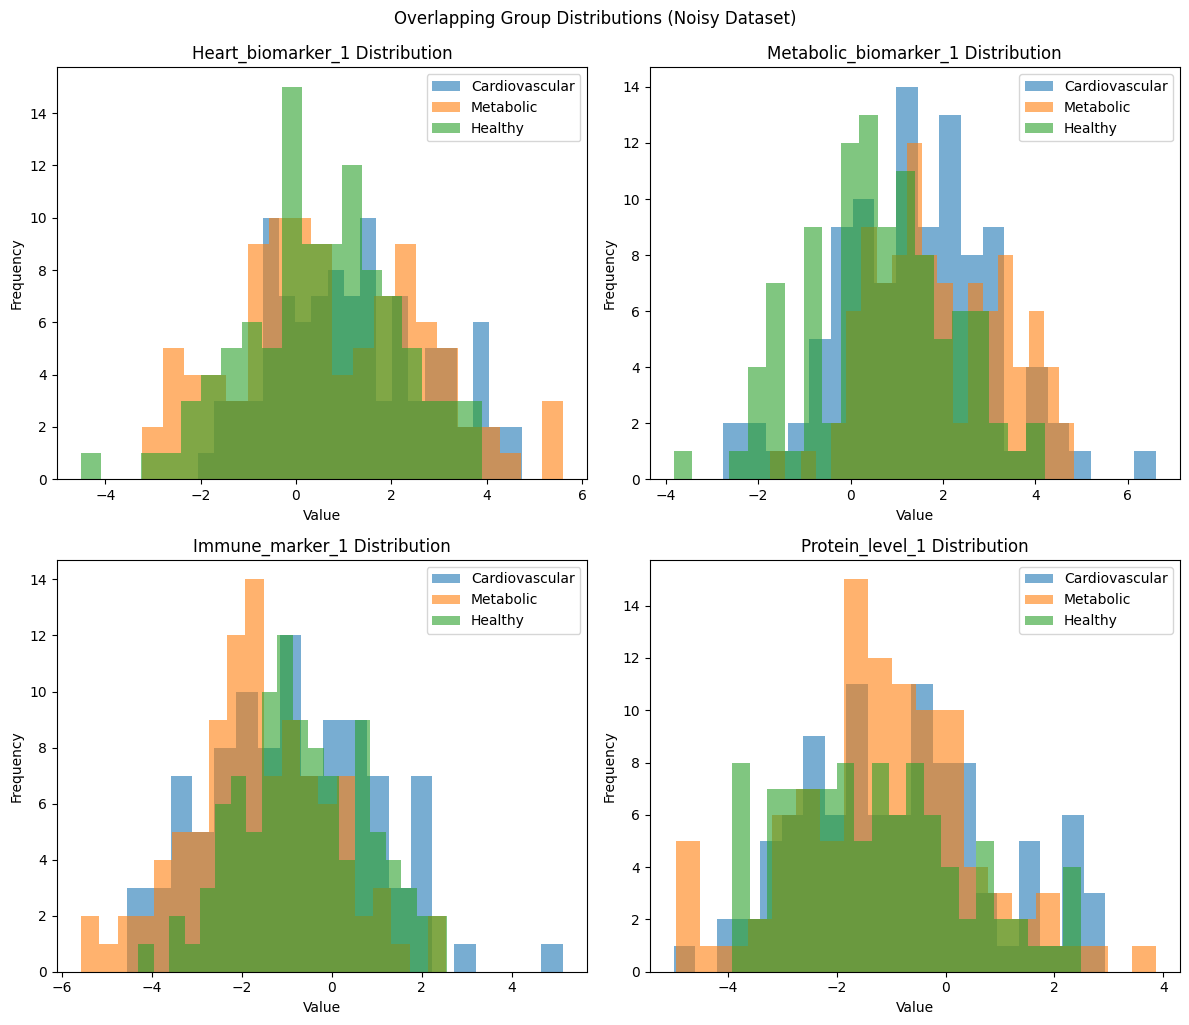

Dataset shape: (300, 51)
Group counts: diagnosis
Cardiovascular    100
Metabolic         100
Healthy           100
Name: count, dtype: int64


In [75]:
import numpy as np
import pandas as pd

def create_high_dimensional_clinical_dataset():
    """
    Create a high-dimensional clinical dataset with 3 overlapping patient groups
    """
    n_samples_per_group = 100
    n_features = 50  # High dimensional
    
    # Group 1: Cardiovascular patients (reduced separation, increased noise)
    cardio_mean = np.random.normal(0, 0.8, n_features)  # Increased baseline noise
    cardio_mean[0:10] = [1.2, 1.5, 1.3, 1.6, 1.4, 1.5, 1.1, 1.7, 1.2, 1.6]  # Reduced signal strength
    cardio_data = np.random.multivariate_normal(
        cardio_mean, 
        np.eye(n_features) * 1.2,  # Much higher variance (was 0.3)
        n_samples_per_group
    )
    
    # Group 2: Metabolic patients (overlapping with cardio)
    metabolic_mean = np.random.normal(0, 0.8, n_features)
    metabolic_mean[10:20] = [1.8, 2.1, 1.9, 2.2, 2.0, 2.1, 1.7, 2.3, 1.8, 2.2]  # Reduced signal
    # Add some overlap with cardio features
    metabolic_mean[0:5] = [0.8, 0.9, 0.7, 1.0, 0.8]  # Partial overlap with cardio
    metabolic_data = np.random.multivariate_normal(
        metabolic_mean, 
        np.eye(n_features) * 1.2,  # High variance
        n_samples_per_group
    )
    
    # Group 3: Healthy controls (overlapping with both groups)
    healthy_mean = np.random.normal(0, 0.8, n_features)
    healthy_mean[20:30] = [-0.6, -0.4, -0.7, -0.5, -0.8, -0.4, -0.6, -0.5, -0.7, -0.5]  # Closer to zero
    # Add overlap with other groups
    healthy_mean[0:3] = [0.3, 0.4, 0.2]  # Some cardio overlap
    healthy_mean[10:13] = [0.5, 0.6, 0.4]  # Some metabolic overlap
    healthy_data = np.random.multivariate_normal(
        healthy_mean, 
        np.eye(n_features) * 1.2,  # High variance
        n_samples_per_group
    )
    
    # Add additional noise to make groups more overlapping
    noise_factor = 1.2
    cardio_data += np.random.normal(0, noise_factor, cardio_data.shape)
    metabolic_data += np.random.normal(0, noise_factor, metabolic_data.shape)
    healthy_data += np.random.normal(0, noise_factor, healthy_data.shape)
    
    # Create some "misclassified" or borderline cases
    n_confusing = 30  # Number of confusing cases per group
    
    # Make some cardio patients look metabolic
    cardio_data[-n_confusing:, 10:20] += np.random.normal(1.0, 0.5, (n_confusing, 10))
    
    # Make some metabolic patients look healthy
    metabolic_data[-n_confusing:, 20:30] += np.random.normal(-0.8, 0.3, (n_confusing, 10))
    
    # Make some healthy patients have elevated markers
    healthy_data[-n_confusing:, 0:10] += np.random.normal(0.8, 0.4, (n_confusing, 10))
    
    # Combine all data
    all_data = np.vstack([cardio_data, metabolic_data, healthy_data])
    labels = np.array(['Cardiovascular'] * n_samples_per_group + 
                     ['Metabolic'] * n_samples_per_group + 
                     ['Healthy'] * n_samples_per_group)
    
    # Create feature names
    feature_names = []
    feature_names.extend([f'Heart_biomarker_{i+1}' for i in range(10)])
    feature_names.extend([f'Metabolic_biomarker_{i+1}' for i in range(10)])
    feature_names.extend([f'Immune_marker_{i+1}' for i in range(10)])
    feature_names.extend([f'Protein_level_{i+1}' for i in range(10)])
    feature_names.extend([f'Gene_expression_{i+1}' for i in range(10)])
    
    # Create DataFrame
    df = pd.DataFrame(all_data, columns=feature_names)
    df['diagnosis'] = labels
    
    return df

# Create the dataset
df = create_high_dimensional_clinical_dataset()

# Visualize the noise/overlap
import matplotlib.pyplot as plt
import seaborn as sns

# Check overlap with a few key features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot distributions of key biomarkers
for i, (feature, ax) in enumerate(zip(['Heart_biomarker_1', 'Metabolic_biomarker_1', 
                                      'Immune_marker_1', 'Protein_level_1'], axes.flat)):
    for diagnosis in df['diagnosis'].unique():
        subset = df[df['diagnosis'] == diagnosis][feature]
        ax.hist(subset, alpha=0.6, label=diagnosis, bins=20)
    ax.set_title(f'{feature} Distribution')
    ax.legend()
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Overlapping Group Distributions (Noisy Dataset)', y=1.02)
plt.show()

print(f"Dataset shape: {df.shape}")
print(f"Group counts: {df['diagnosis'].value_counts()}")


In [76]:
# Student Code

In [77]:
# Load the dataset
#df = pd.read_csv("clinical_data.csv")

In [78]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFeature Types:")
print(df.dtypes.value_counts())
print("\nDiagnosis Distribution:")
print(df['diagnosis'].value_counts())

Dataset Shape: (300, 51)

Feature Types:
float64    50
object      1
Name: count, dtype: int64

Diagnosis Distribution:
diagnosis
Cardiovascular    100
Metabolic         100
Healthy           100
Name: count, dtype: int64


In [79]:
# Prepare data for dimensionality reduction
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

300 Samples
50 Features, all numeric
1 outcome column, which is categorical (diagnosis), with 3 classes

### b) Apply t-SNE
- Apply t-SNE and visualize it. Are the distances between the clusters interpretable?

#### Your Answer:

In [80]:
# Student Code

#### Solution:
No, only the within cluster distance is interpretable.

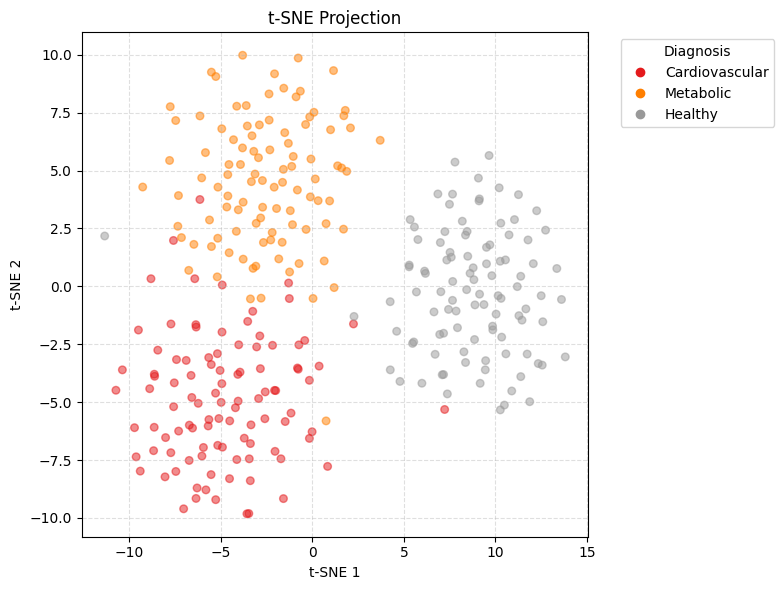

In [81]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plot_projection(X_tsne, y, title="t-SNE Projection",
                xlabel="t-SNE 1",
                ylabel="t-SNE 2",
                legend_title="Diagnosis")

### c) Now perform UMAP and visualize it.
- Are the distances between the clusters interpretable?

#### Your Answer:

In [26]:
# Student Code

#### Solution:
Yes, both the small distances (within clusters) and between clusters (long distances) are interpretable.

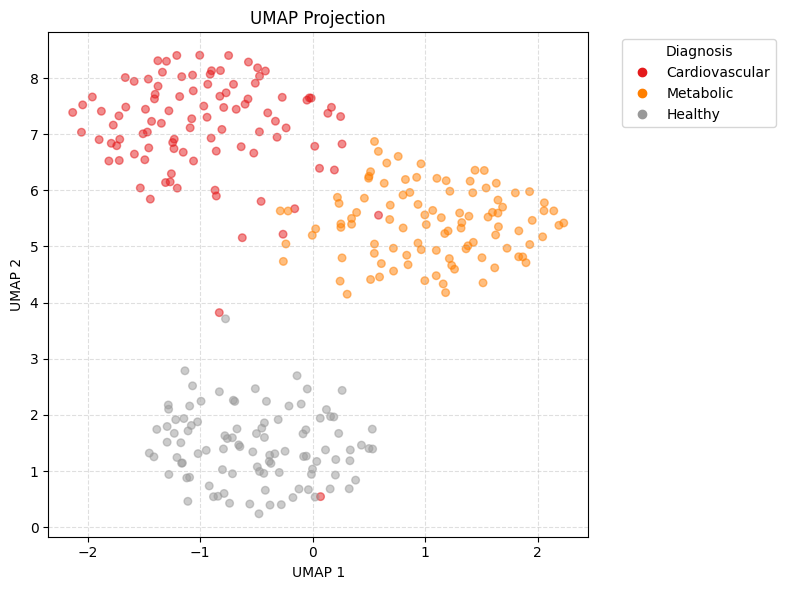

In [82]:
# Apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X)

# Plot UMAP results
plot_projection(X_umap, y, title="UMAP Projection",
                xlabel="UMAP 1",
                ylabel="UMAP 2",
                legend_title="Diagnosis")

### d) Additionally perform PCA and visualize the reduced data.

In [28]:
# Student Code

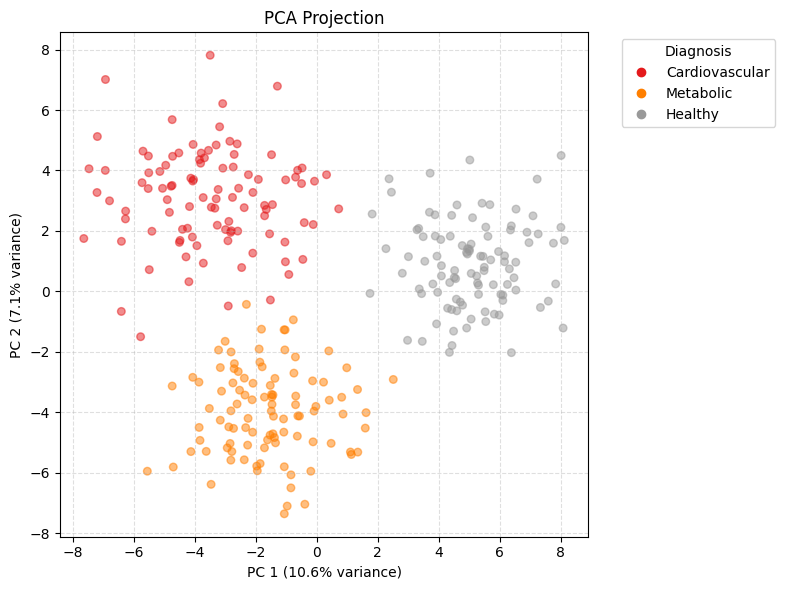

In [83]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA results
plot_projection(X_pca, y, title="PCA Projection",
                xlabel=f"PC 1 ({pca.explained_variance_ratio_[0]*100:.1f}% variance)",
                ylabel=f"PC 2 ({pca.explained_variance_ratio_[1]*100:.1f}% variance)",
                legend_title="Diagnosis")

### e) Interpret the plots. What can you conclude?

#### Your Answer:

#### Solution:
PCA works well because small to moderate N dataset with small to moderate number of features, also data seems to be well-representable in linear low dimensional subspace.

## 5. Similarity Matrix

Todo little introduction to dataset.

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import umap

# Set random seed for reproducibility
np.random.seed(42)

def create_fmri_dataset():
    """
    Create simulated fMRI data from face recognition experiment
    """
    n_face_images = 50
    n_house_images = 50
    n_total_images = n_face_images + n_house_images
    
    # Number of voxels in each brain region
    n_voxels_face_region = 200  # Face-selective region (e.g., Fusiform Face Area)
    n_voxels_other_region = 200  # Non-face-selective visual region
    
    # === FACE-SELECTIVE BRAIN REGION ===
    # Face images: Strong, distinctive activation patterns
    face_base_pattern = np.random.normal(2.0, 0.5, n_voxels_face_region)  # High baseline activation
    face_activation = []
    for i in range(n_face_images):
        # Each face image has a distinct but related pattern
        individual_face = face_base_pattern + np.random.normal(0, 0.3, n_voxels_face_region)
        # Add some face-specific features (certain voxels respond more to faces)
        individual_face[50:100] += np.random.normal(1.5, 0.2, 50)  # Face-selective voxels
        face_activation.append(individual_face)
    
    # House images: Weaker, different activation patterns  
    house_base_pattern = np.random.normal(0.5, 0.4, n_voxels_face_region)  # Lower baseline
    house_activation = []
    for i in range(n_house_images):
        # House images produce different, weaker patterns in face region
        individual_house = house_base_pattern + np.random.normal(0, 0.4, n_voxels_face_region)
        # Some suppression in face-selective areas
        individual_house[50:100] -= np.random.normal(0.3, 0.1, 50)
        house_activation.append(individual_house)
    
    face_region_data = np.vstack([face_activation, house_activation])
    
    # === NON-FACE-SELECTIVE BRAIN REGION ===
    # Both face and house images produce similar activation patterns
    visual_base_pattern = np.random.normal(1.0, 0.4, n_voxels_other_region)
    
    face_activation_other = []
    house_activation_other = []
    
    for i in range(n_face_images):
        # Face images: similar pattern to houses with small variations
        individual_face = visual_base_pattern + np.random.normal(0, 0.5, n_voxels_other_region)
        face_activation_other.append(individual_face)
    
    for i in range(n_house_images):
        # House images: similar pattern to faces with small variations
        individual_house = visual_base_pattern + np.random.normal(0, 0.5, n_voxels_other_region)
        house_activation_other.append(individual_house)
    
    other_region_data = np.vstack([face_activation_other, house_activation_other])
    
    # Create labels
    labels = ['Face'] * n_face_images + ['House'] * n_house_images
    image_ids = [f'Face_{i+1}' for i in range(n_face_images)] + [f'House_{i+1}' for i in range(n_house_images)]
    
    labels = np.array(labels)

    # TODO maybe scale it
    
    return face_region_data, other_region_data, labels, image_ids

# Create the dataset
face_region_data, other_region_data, labels, image_ids = create_fmri_dataset()

print("fMRI Dataset Created:")
#print(f"- {len(labels)} total images ({labels.count('Face')} faces, {labels.count('House')} houses)")
print(f"- Face-selective region: {face_region_data.shape[1]} voxels")
print(f"- Other visual region: {other_region_data.shape[1]} voxels")
print(f"- Face region data shape: {face_region_data.shape}")
print(f"- Other region data shape: {other_region_data.shape}")

# Load data and assign to separate variables (as requested)
print("\n" + "="*50)
print("LOADING DATA AND ASSIGNING TO VARIABLES:")
print("="*50)

# Assign each brain region to separate variables
face_selective_region = face_region_data.copy()
other_visual_region = other_region_data.copy()

print(f"face_selective_region shape: {face_selective_region.shape}")
print(f"other_visual_region shape: {other_visual_region.shape}")
print(f"Labels: {len(labels)} image categories")


fMRI Dataset Created:
- Face-selective region: 200 voxels
- Other visual region: 200 voxels
- Face region data shape: (100, 200)
- Other region data shape: (100, 200)

LOADING DATA AND ASSIGNING TO VARIABLES:
face_selective_region shape: (100, 200)
other_visual_region shape: (100, 200)
Labels: 100 image categories


fMRI Dataset Created:
- Face-selective region: 200 voxels
- Other visual region: 200 voxels
- Face region data shape: (100, 200)
- Other region data shape: (100, 200)

LOADING DATA AND ASSIGNING TO VARIABLES:
face_selective_region shape: (100, 200)
other_visual_region shape: (100, 200)
Labels: 100 image categories


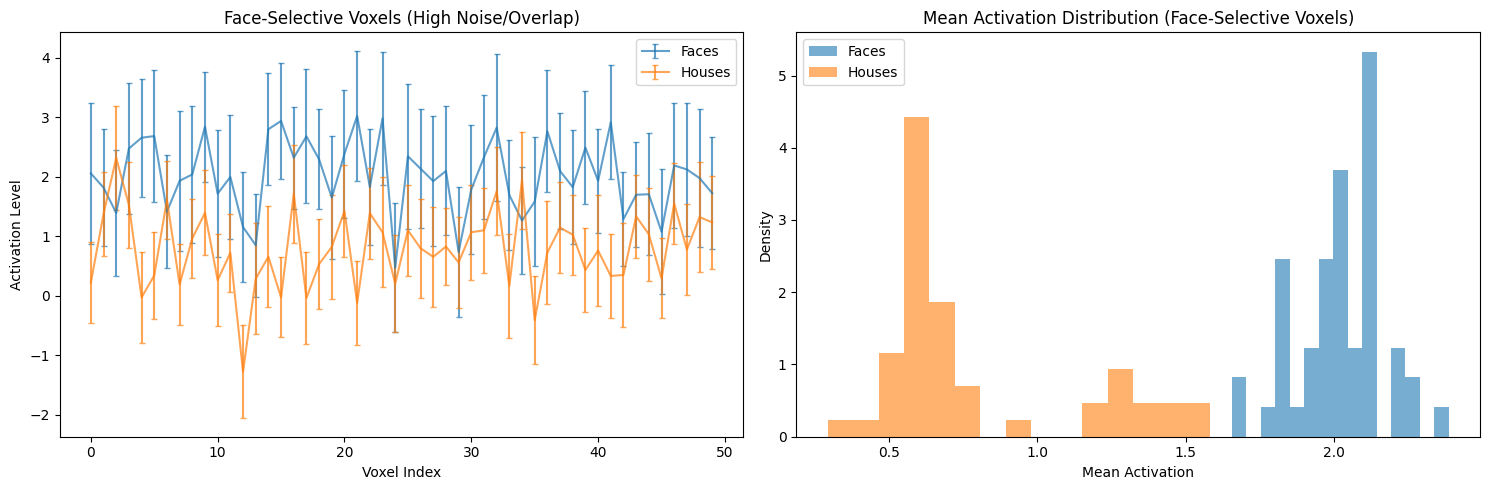

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import umap

# Set random seed for reproducibility
np.random.seed(42)

def create_fmri_dataset():
    """
    Create simulated fMRI data from face recognition experiment with noisy, overlapping patterns
    """
    n_face_images = 50
    n_house_images = 50
    n_total_images = n_face_images + n_house_images
    
    # Number of voxels in each brain region
    n_voxels_face_region = 200  # Face-selective region (e.g., Fusiform Face Area)
    n_voxels_other_region = 200  # Non-face-selective visual region
    
    # === FACE-SELECTIVE BRAIN REGION (MUCH NOISIER) ===
    # Reduced baseline difference between face and house responses
    face_base_pattern = np.random.normal(1.2, 0.7, n_voxels_face_region)  # Reduced from 2.0, increased noise
    house_base_pattern = np.random.normal(0.8, 0.6, n_voxels_face_region)  # Increased from 0.5, more overlap
    
    face_activation = []
    house_activation = []
    
    # Create face activations with high variability
    for i in range(n_face_images):
        # High individual variability between face images
        individual_face = face_base_pattern + np.random.normal(0, 0.9, n_voxels_face_region)  # Increased noise
        
        # Face-selective voxels are less consistent
        face_selective_boost = np.random.normal(0.8, 0.5, 50)  # Reduced from 1.5, more variable
        individual_face[50:100] += face_selective_boost
        
        # Add some "bad" face trials that don't show typical pattern
        # if i < 10:  # 20% of face trials are "noisy"
        #     individual_face += np.random.normal(0, 0.8, n_voxels_face_region)  # Extra noise
        #     individual_face[50:100] -= np.random.normal(0.3, 0.2, 50)  # Reduced face response
        
        face_activation.append(individual_face)
    
    # Create house activations with some face-like responses
    for i in range(n_house_images):
        individual_house = house_base_pattern + np.random.normal(0, 0.6, n_voxels_face_region)
        
        # Less consistent suppression in face-selective areas
        suppression = np.random.normal(0.2, 0.3, 50)  # Reduced and more variable suppression
        individual_house[50:100] -= suppression
        
        # Some house trials accidentally activate face regions
        if i < 12:  # 24% of house trials look somewhat face-like
            individual_house[50:100] += np.random.normal(0.6, 0.4, 50)  # Accidental face activation
        
        # Add measurement noise/artifacts
        if i < 8:  # 16% of house trials have artifacts
            artifact_voxels = np.random.choice(n_voxels_face_region, 30, replace=False)
            individual_house[artifact_voxels] += np.random.normal(1.0, 0.5, 30)
        
        house_activation.append(individual_house)
    
    face_region_data = np.vstack([face_activation, house_activation])
    
    # === NON-FACE-SELECTIVE BRAIN REGION (Also noisier) ===
    visual_base_pattern = np.random.normal(1.0, 0.6, n_voxels_other_region)  # Increased baseline noise
    
    face_activation_other = []
    house_activation_other = []
    
    for i in range(n_face_images):
        # More variable responses for faces in non-selective region
        individual_face = visual_base_pattern + np.random.normal(0, 0.8, n_voxels_other_region)  # Increased noise
        face_activation_other.append(individual_face)
    
    for i in range(n_house_images):
        # More variable responses for houses in non-selective region  
        individual_house = visual_base_pattern + np.random.normal(0, 0.8, n_voxels_other_region)  # Increased noise
        house_activation_other.append(individual_house)
    
    other_region_data = np.vstack([face_activation_other, house_activation_other])
    
    # Create labels
    labels = ['Face'] * n_face_images + ['House'] * n_house_images
    image_ids = [f'Face_{i+1}' for i in range(n_face_images)] + [f'House_{i+1}' for i in range(n_house_images)]
    
    labels = np.array(labels)

    return face_region_data, other_region_data, labels, image_ids

# Create the dataset
face_region_data, other_region_data, labels, image_ids = create_fmri_dataset()

print("fMRI Dataset Created:")
print(f"- Face-selective region: {face_region_data.shape[1]} voxels")
print(f"- Other visual region: {other_region_data.shape[1]} voxels")
print(f"- Face region data shape: {face_region_data.shape}")
print(f"- Other region data shape: {other_region_data.shape}")

# Load data and assign to separate variables (as requested)
print("\n" + "="*50)
print("LOADING DATA AND ASSIGNING TO VARIABLES:")
print("="*50)

# Assign each brain region to separate variables
face_selective_region = face_region_data.copy()
other_visual_region = other_region_data.copy()

print(f"face_selective_region shape: {face_selective_region.shape}")
print(f"other_visual_region shape: {other_visual_region.shape}")
print(f"Labels: {len(labels)} image categories")

# Visualize the increased noise/overlap
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot mean activation patterns with error bars
face_indices = np.where(np.array(labels) == 'Face')[0]
house_indices = np.where(np.array(labels) == 'House')[0]

# Face-selective region
face_mean_face = np.mean(face_selective_region[face_indices, 50:100], axis=0)
face_std_face = np.std(face_selective_region[face_indices, 50:100], axis=0)
house_mean_face = np.mean(face_selective_region[house_indices, 50:100], axis=0)
house_std_face = np.std(face_selective_region[house_indices, 50:100], axis=0)

x = np.arange(50)
axes[0].errorbar(x, face_mean_face, yerr=face_std_face, alpha=0.7, label='Faces', capsize=2)
axes[0].errorbar(x, house_mean_face, yerr=house_std_face, alpha=0.7, label='Houses', capsize=2)
axes[0].set_title('Face-Selective Voxels (High Noise/Overlap)')
axes[0].set_xlabel('Voxel Index')
axes[0].set_ylabel('Activation Level')
axes[0].legend()

# Distribution overlap visualization
axes[1].hist(np.mean(face_selective_region[face_indices, 50:100], axis=1), 
           alpha=0.6, bins=15, label='Faces', density=True)
axes[1].hist(np.mean(face_selective_region[house_indices, 50:100], axis=1), 
           alpha=0.6, bins=15, label='Houses', density=True)
axes[1].set_title('Mean Activation Distribution (Face-Selective Voxels)')
axes[1].set_xlabel('Mean Activation')
axes[1].set_ylabel('Density')
axes[1].legend()

plt.tight_layout()
plt.show()


### a) Explore dataset
- TODO: Specify dataset once fixed

In [183]:
# Student Code

In [184]:
# Solution TODO: Once fixed

### b) Similarity Matrix
- Compute the similarity matrix for the face-selective and the other region of the fMRI dataset using the Euclidean distance.

#### Your Answer:

In [185]:
# Code

#### Solution:

In [186]:
# Compute the full distance matrices
euclidean_dist_face = pairwise_distances(face_region_data, metric='euclidean')

euclidean_dist_other = pairwise_distances(other_region_data, metric='euclidean')

### c) Now plot the similarity matrices for both regions.
- What do you observe? 
- Are there any differences between the two regions?

#### Your Answer:

In [187]:
# Student Code

#### Solution:

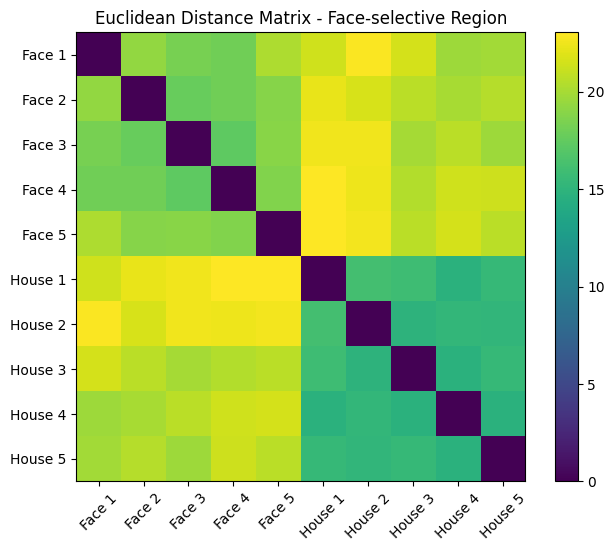

In [188]:
plot_similarity_matrices(
    euclidean_dist_face,
    labels,
    titles=["Euclidean Distance Matrix - Face-selective Region"],
)

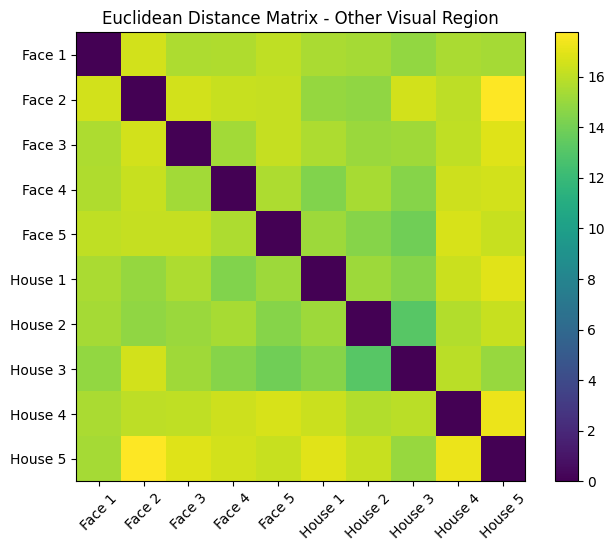

In [189]:
plot_similarity_matrices(
    euclidean_dist_other,
    labels,
    titles=["Euclidean Distance Matrix - Other Visual Region"],
)

As we can see there's a clear distinction in the face region data. We see that the similarity between faces and between houses is very high, while the similarity between the categories is low. This indicates that the face-selective region is specialized for processing faces, while the other region does not show such a clear specialization.

### d) Perform PCA and UMAP seperately for both regions and visualize the data.
- Do the plots underline your conclusion of the similarity matrix heatmaps? 
- What does this tell us about these brain regions?

#### Your Answer:

In [134]:
# Student Code

#### Solution:

In [135]:
# PCA on distance matrices
pca = PCA(n_components=2)
euclidean_pca_face = pca.fit_transform(euclidean_dist_face)

euclidean_pca_other = pca.fit_transform(euclidean_dist_other)


In [136]:

# UMAP on distance matrices
umap_model = umap.UMAP(n_components=2)
euclidean_umap_face = umap_model.fit_transform(euclidean_dist_face)

euclidean_umap_other = umap_model.fit_transform(euclidean_dist_other)

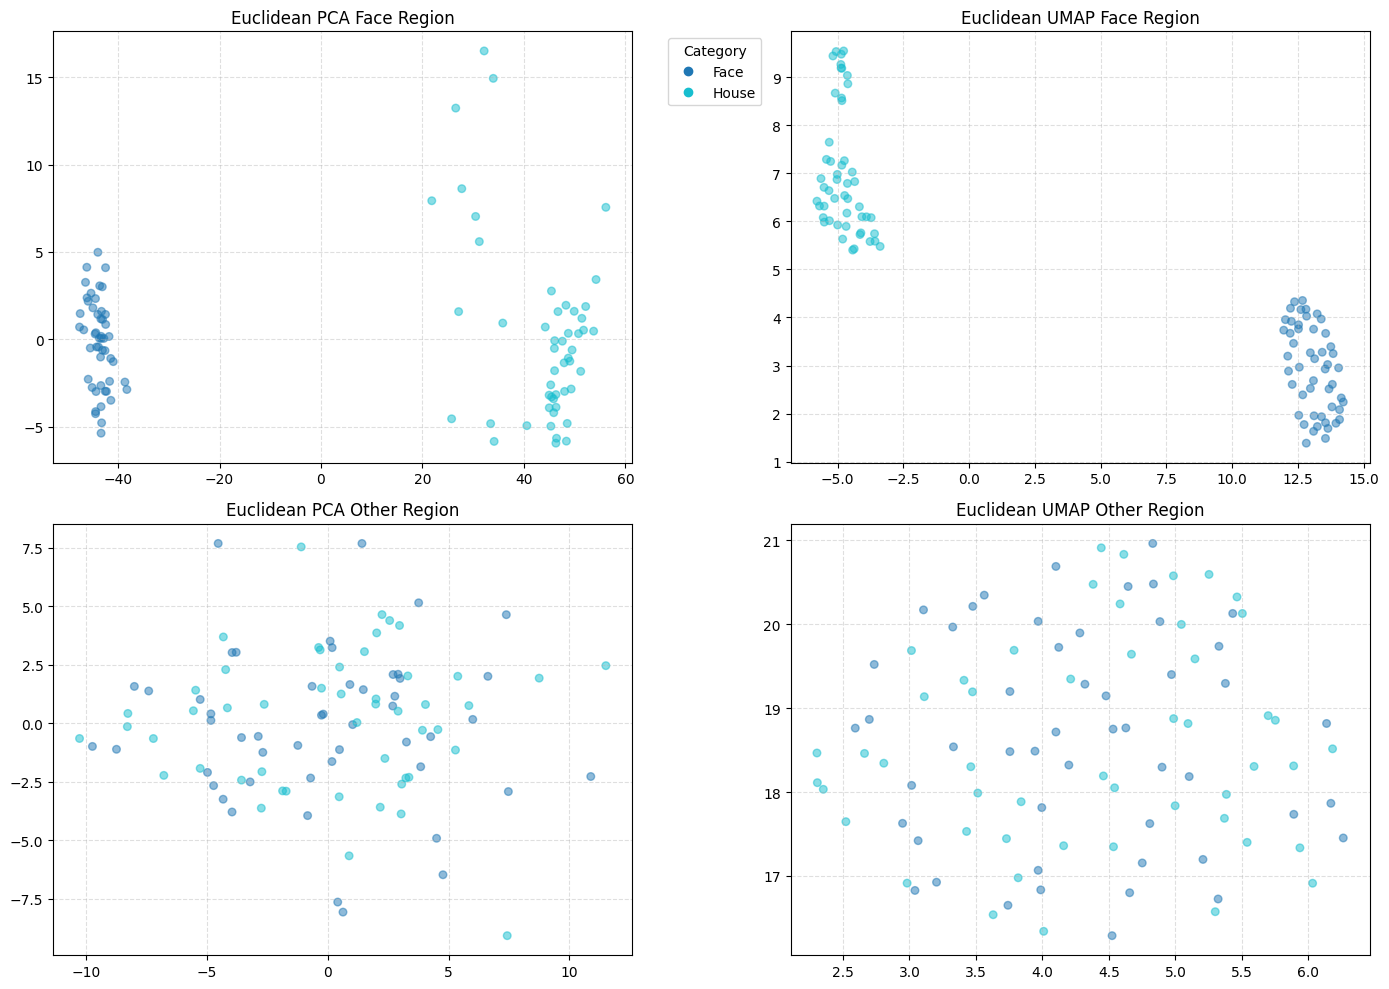

In [137]:
# Plotting
embeddings = [
    (euclidean_pca_face, labels, 'Euclidean PCA Face Region'),
    (euclidean_umap_face, labels, 'Euclidean UMAP Face Region'),
    (euclidean_pca_other, labels, 'Euclidean PCA Other Region'),
    (euclidean_umap_other, labels, 'Euclidean UMAP Other Region'),
]

plot_projection_grid(embeddings, dataset_name='auto')

The dimensionality reduction plots confirm the similarity matrix results - the face-selective region shows clear separation between face and house clusters, while the other region shows overlapping patterns. This reveals that the face-selective region is functionally specialized for processing face-specific features, while the other region responds similarly to both categories, demonstrating the principle of functional specialization in brain organization.